# 2D Capillary Rise
![2DCapillaryRise domain configuration](2DCapillaryRise.png)

The process of liquid flowing through narrow spaces, known as capillary action, has been studied profoundly. The process can be observed in the distribution of water from plants’ roots to the rest of the body, the rising of liquids in porous media such as paper, and oil extraction from reservoirs, among others.

In this validation study, we consider the rising of a liquid column between two planar surfaces. We present the results of the mesh convergence study of a 2D capillary rise with no-slip and resolved partial slip boundary condition. We present the comparison of the plicRDF-isoAdvector method with other numerical methods, 1. the OpenFOAM solver interTrackFoam, an Arbitrary Lagrangian-Eulerian (ALE) method, 2. the Free Surface 3D (FS3D), an in-house two-phase flow solver implying the geometric Volume-of-Fluid (VOF) method, 3. the OpenFOAM-based algebraic VOF solver, interFoam, 4. the Bounded Support Spectral Solver (BoSSS) is based on the extended discontinuous Galerkin method. As discussed by [Dründing et. al.](https://doi.org/10.1016/j.apm.2020.04.020), the dynamics of capillary rise can be controlled by a non-dimensionless group, $\Omega$, defined as

\begin{equation}
\Omega = \sqrt{\frac{9\sigma\cos\theta \mu^2}{\rho^3g^2R^5}}.
\end{equation}

The capillary's rise behavior (monotonic ($\Omega>2$) or oscillatory ($\Omega \leq 2$)) depends on the choice of $\Omega$ . The height of the liquid column is estimated by Jurin’s law as

\begin{equation}
h_{Jurin,2D} = \frac{\sigma \cos{\theta}}{R\rho g},
\label{eq:Jurins-height}
\end{equation}

where $\sigma$ is the surface tension coefficient, $R$ is the radius of the capillary, $\rho$ is the density of the liquid, $g$ is the gravitational acceleration, and $\theta$ is the contact angle. [Dründing et. al.](https://doi.org/10.1016/j.ijmultiphaseflow.2020.103210) the liquid volume in the interface region and calculated the corrected stationary capillary height $h$ as

\begin{equation}
h = h_{Jurin,2D} -\frac{R}{2\cos\theta} \left(2-sin\theta - \frac{\sin^{-1}(\cos\theta)}{\cos\theta}\right).
\label{eq:corrected-capillary-height}
\end{equation}

In [1]:
import numpy as np
from scipy.optimize import fsolve
import math
import sys
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import csv
import pandas as pd
import vtk
sys.path.append(os.path.join(os.getcwd(), '../modules'))
from capillary_funcs import Funcs
sin =np.sin
cos= np.cos
pi = np.pi
contact_angle =30
theta =np.deg2rad(contact_angle)
R0 = 0.005
eps = 1e-10

rcParams["figure.dpi"] = 600
fontSize =12
#Reference solution
#Jurin's height approximation for this casae setup
h_j=4*R0
print('h_j: ' + str(h_j))
h_cap = (R0/2/math.cos(theta))  * (2-sin(theta) - (math.asin(cos(theta)) /cos(theta)))
print('h_cap: ' + str(h_cap))
#stationary rise height
h_apex = h_j-h_cap
print('h_apex: ' + str(h_apex))

h_j: 0.02
h_cap: 0.0008394685149335336
h_apex: 0.019160531485066468


## Mesh convergence, $\Omega = 1$

['/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/testOmega1_00000_case/postProcessing/height.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/testOmega1_00005_case/postProcessing/height.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/testOmega1_00010_case/postProcessing/height.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/testOmega1_00015_case/postProcessing/height.csv']
[16, 32, 64, 128]


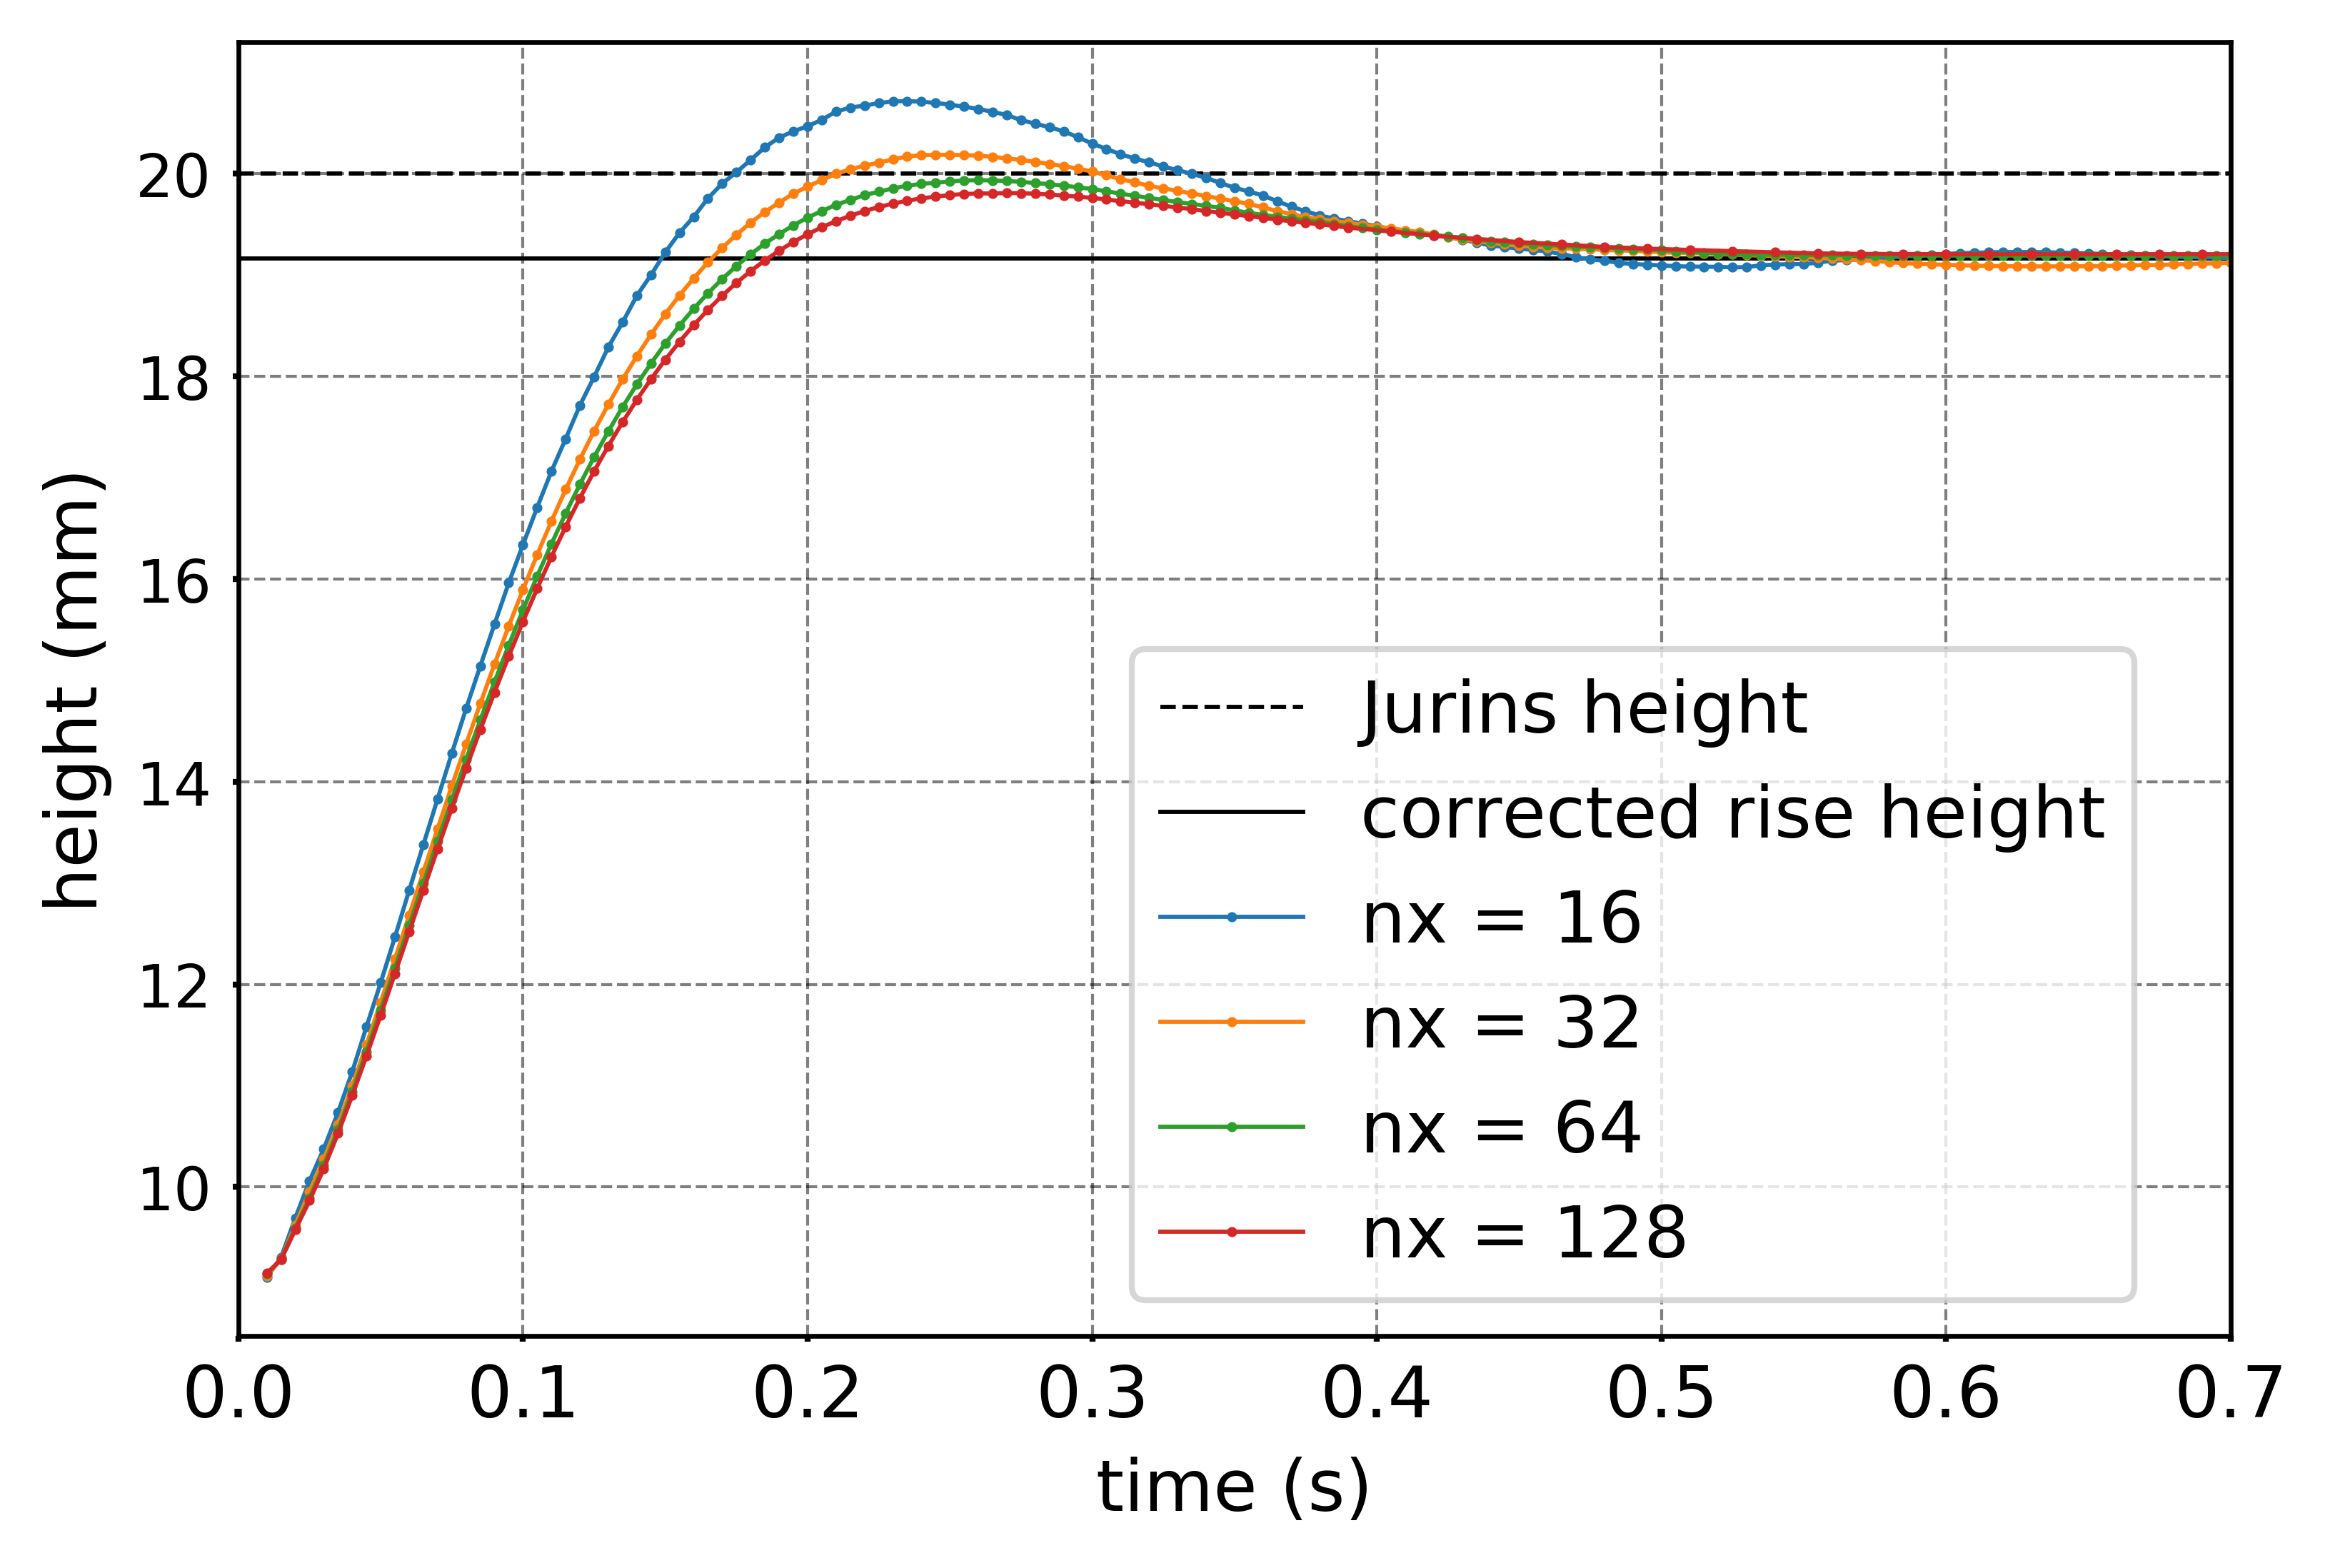

In [2]:
calcHeights = False #True if the simulations are run again and need to write the height.csv from vtk files

#Reference solution line
plt.axhline(h_j*1000.0, color='black', linewidth=0.7,linestyle='dashed', label = "Jurins height")
#Reference solution line
plt.axhline(h_apex*1000.0, color='black', linewidth=0.7, label = "corrected rise height")

###################################################################################################################
## Simulation Results
   

##################################################################################################################

vtk_folders = Funcs.fileStructure('surfaces/', 'testOmega1')
heightFileNames = Funcs.fileStructure('height.csv','testOmega1')
print(heightFileNames)

###############################################################################################################

Funcs.writeHeightFile(calcHeights, vtk_folders, heightFileNames)

#Plot equilibrium spread against static contact angle
cellsPerRadius = Funcs.fileMapping('testOmega1')
print(cellsPerRadius)

for idx, heightFile in enumerate(heightFileNames):
    pd.set_option('display.float_format', lambda x: '%.1f' % x)
    df = pd.read_csv(heightFile, index_col = 0)
    plt.plot(df, linewidth=0.7, label='nx = ' + str(cellsPerRadius[idx]),marker='o', markersize=0.7)
    plt.grid(b=True, which='major', color='black',linestyle='dashed', alpha=0.5, lw=0.5)
    plt.grid(b=True, which='minor', color='black', alpha=0.5, lw=0.5)
    plt.tick_params(axis='both', direction='out', length=1, width=1,  grid_color='black', grid_alpha=0.5)
    #plt.title(r'Capillary height', fontsize=fontSize)
    plt.xlabel("time (s)" ,color='black',fontsize=fontSize)
    plt.ylabel("height (mm)",color='black',fontsize=fontSize)
    plt.legend(loc='lower center', bbox_to_anchor=(0.7, 0), ncol=1, fontsize=fontSize)
    plt.xticks(color='black',size = fontSize)
    plt.xlim([0, 0.7])
    plt.ticklabel_format(axis="y", style='sci', useOffset=True)
    plt.rc('font', size=fontSize)
       
plt.savefig('capillary-rise-convergence-study-Omega_1'+'.pdf', bbox_inches='tight')
plt.savefig('capillary-rise-convergence-study-Omega_1'+'.png', bbox_inches='tight')
plt.show()
#######################################################################################


## Mesh convergence, No-slip BC

['/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/testU0_00000_case/postProcessing/height.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/testU0_00005_case/postProcessing/height.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/testU0_00010_case/postProcessing/height.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/testU0_00015_case/postProcessing/height.csv']
[16, 32, 64, 128]


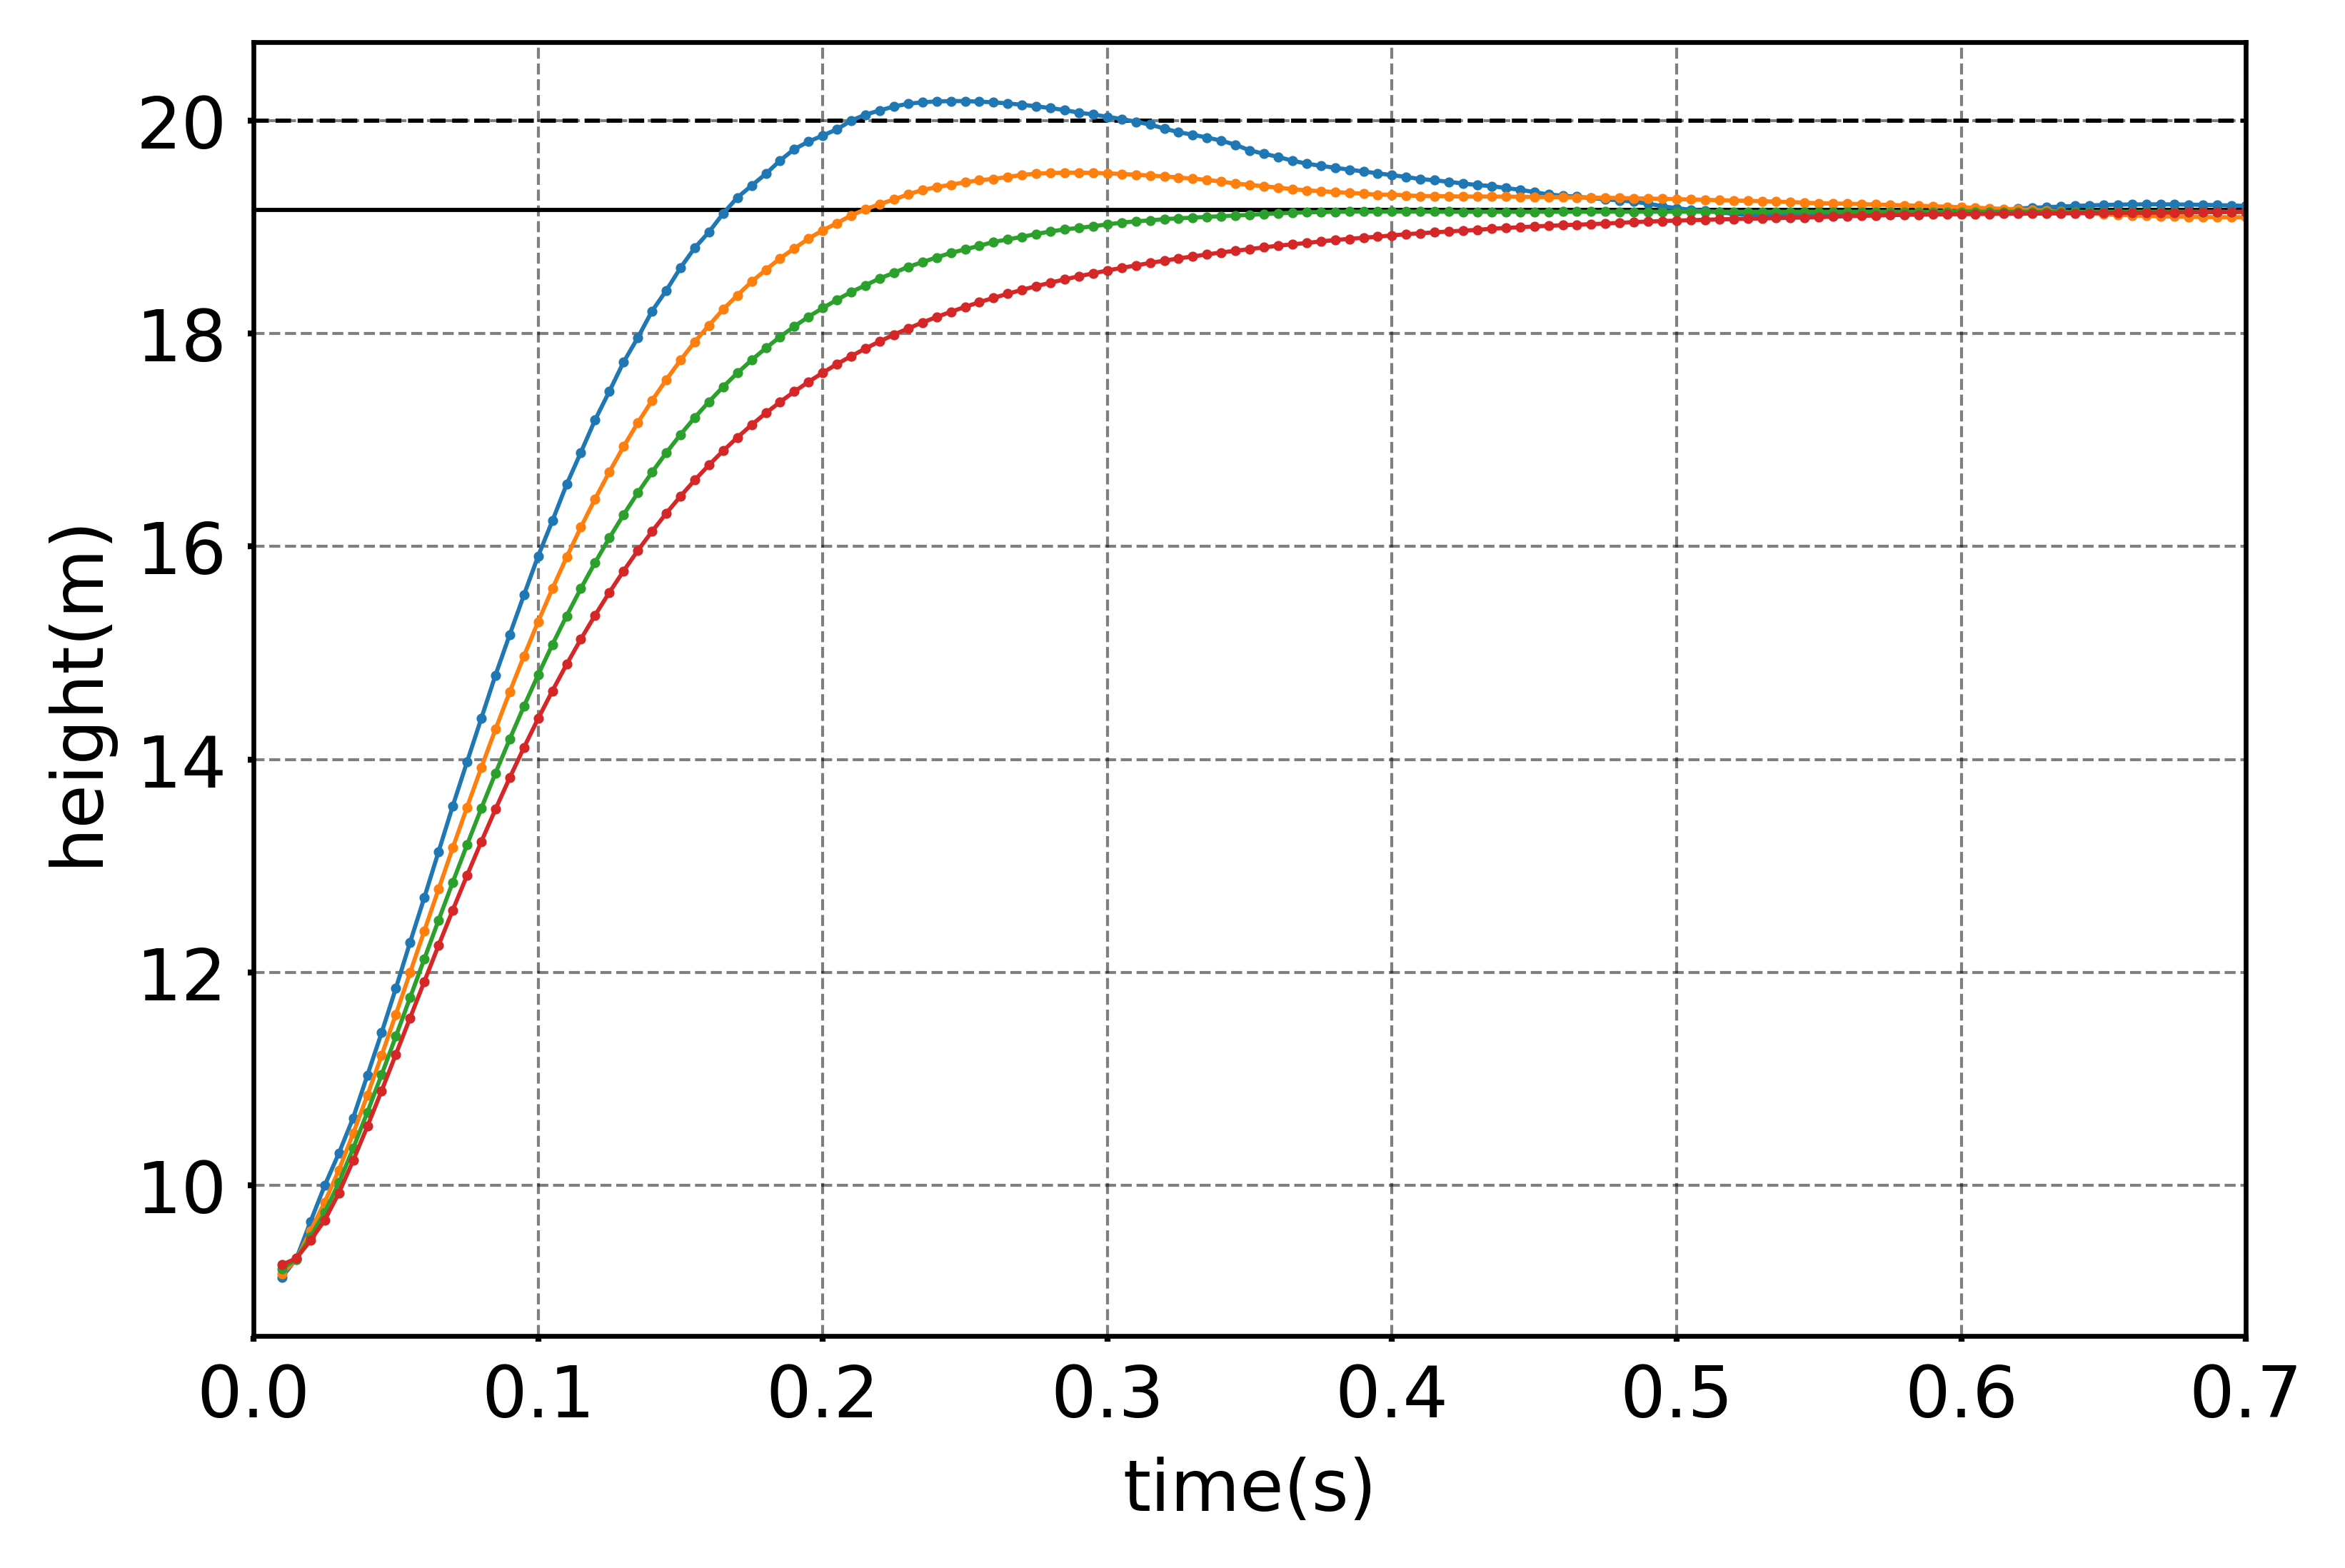

In [3]:
calcHeights = False #True if the simulations are run again and need to write the height.csv

#Reference solution line
plt.axhline(h_j*1000.0, color='black', linewidth=0.7,linestyle='dashed', label = "Jurins height")
#Reference solution line
plt.axhline(h_apex*1000.0, color='black', linewidth=0.7, label = "corrected rise height")

###################################################################################################################    

vtk_folders = Funcs.fileStructure('surfaces/', 'testU0')
heightFileNames = Funcs.fileStructure('height.csv', 'testU0')
print(heightFileNames)

##################################################################################################################

Funcs.writeHeightFile(calcHeights, vtk_folders, heightFileNames)

#Plot equilibrium spread against static contact angle
cellsPerRadius = Funcs.fileMapping('testU0')
print(cellsPerRadius)

for idx, heightFile in enumerate(heightFileNames):
    pd.set_option('display.float_format', lambda x: '%.1f' % x)
    df = pd.read_csv(heightFile, index_col = 0)  
    plt.plot(df, linewidth=0.7, label='nx = ' + str(cellsPerRadius[idx]), marker='o', markersize=0.7)
    plt.grid(b=True, which='major', color='black',linestyle='dashed', alpha=0.5, lw=0.5)
    plt.grid(b=True, which='minor', color='black', alpha=0.5, lw=0.5)
    plt.tick_params(axis='both', direction='out', length=1, width=1,  grid_color='black', grid_alpha=0.5)
    #plt.title('Capillary height convergence study for partial slip', fontsize=fontSize)
    plt.xlabel("time (s)" ,color='black',fontsize=fontSize)
    plt.ylabel("height (mm)",color='black',fontsize=fontSize)
    #plt.legend(loc='lower center', bbox_to_anchor=(0.7, 0), ncol=1, fontsize=fontSize)
    plt.xticks(color='black',size = fontSize)
    plt.yticks(color='black',size = fontSize)
    plt.xlim([0, 0.7])
    plt.ticklabel_format(axis="y", style="plain", useOffset=False)
    plt.rc('font', size=fontSize)

    
## Generate the plot
plt.savefig('capillary-rise-convergence-study-U0'+'.pdf', bbox_inches='tight')
plt.savefig('capillary-rise-convergence-study-U0'+'.png', bbox_inches='tight')
plt.show()
#######################################################################################


## Numerical methods comparison

## $\Omega=0.1$

['/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/numericalMethodComparisonPlots/Omega0.1/ALE.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/numericalMethodComparisonPlots/Omega0.1/BoSSS.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/numericalMethodComparisonPlots/Omega0.1/FS3D.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/numericalMethodComparisonPlots/Omega0.1/interFlow.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/numericalMethodComparisonPlots/Omega0.1/interFoam.csv']


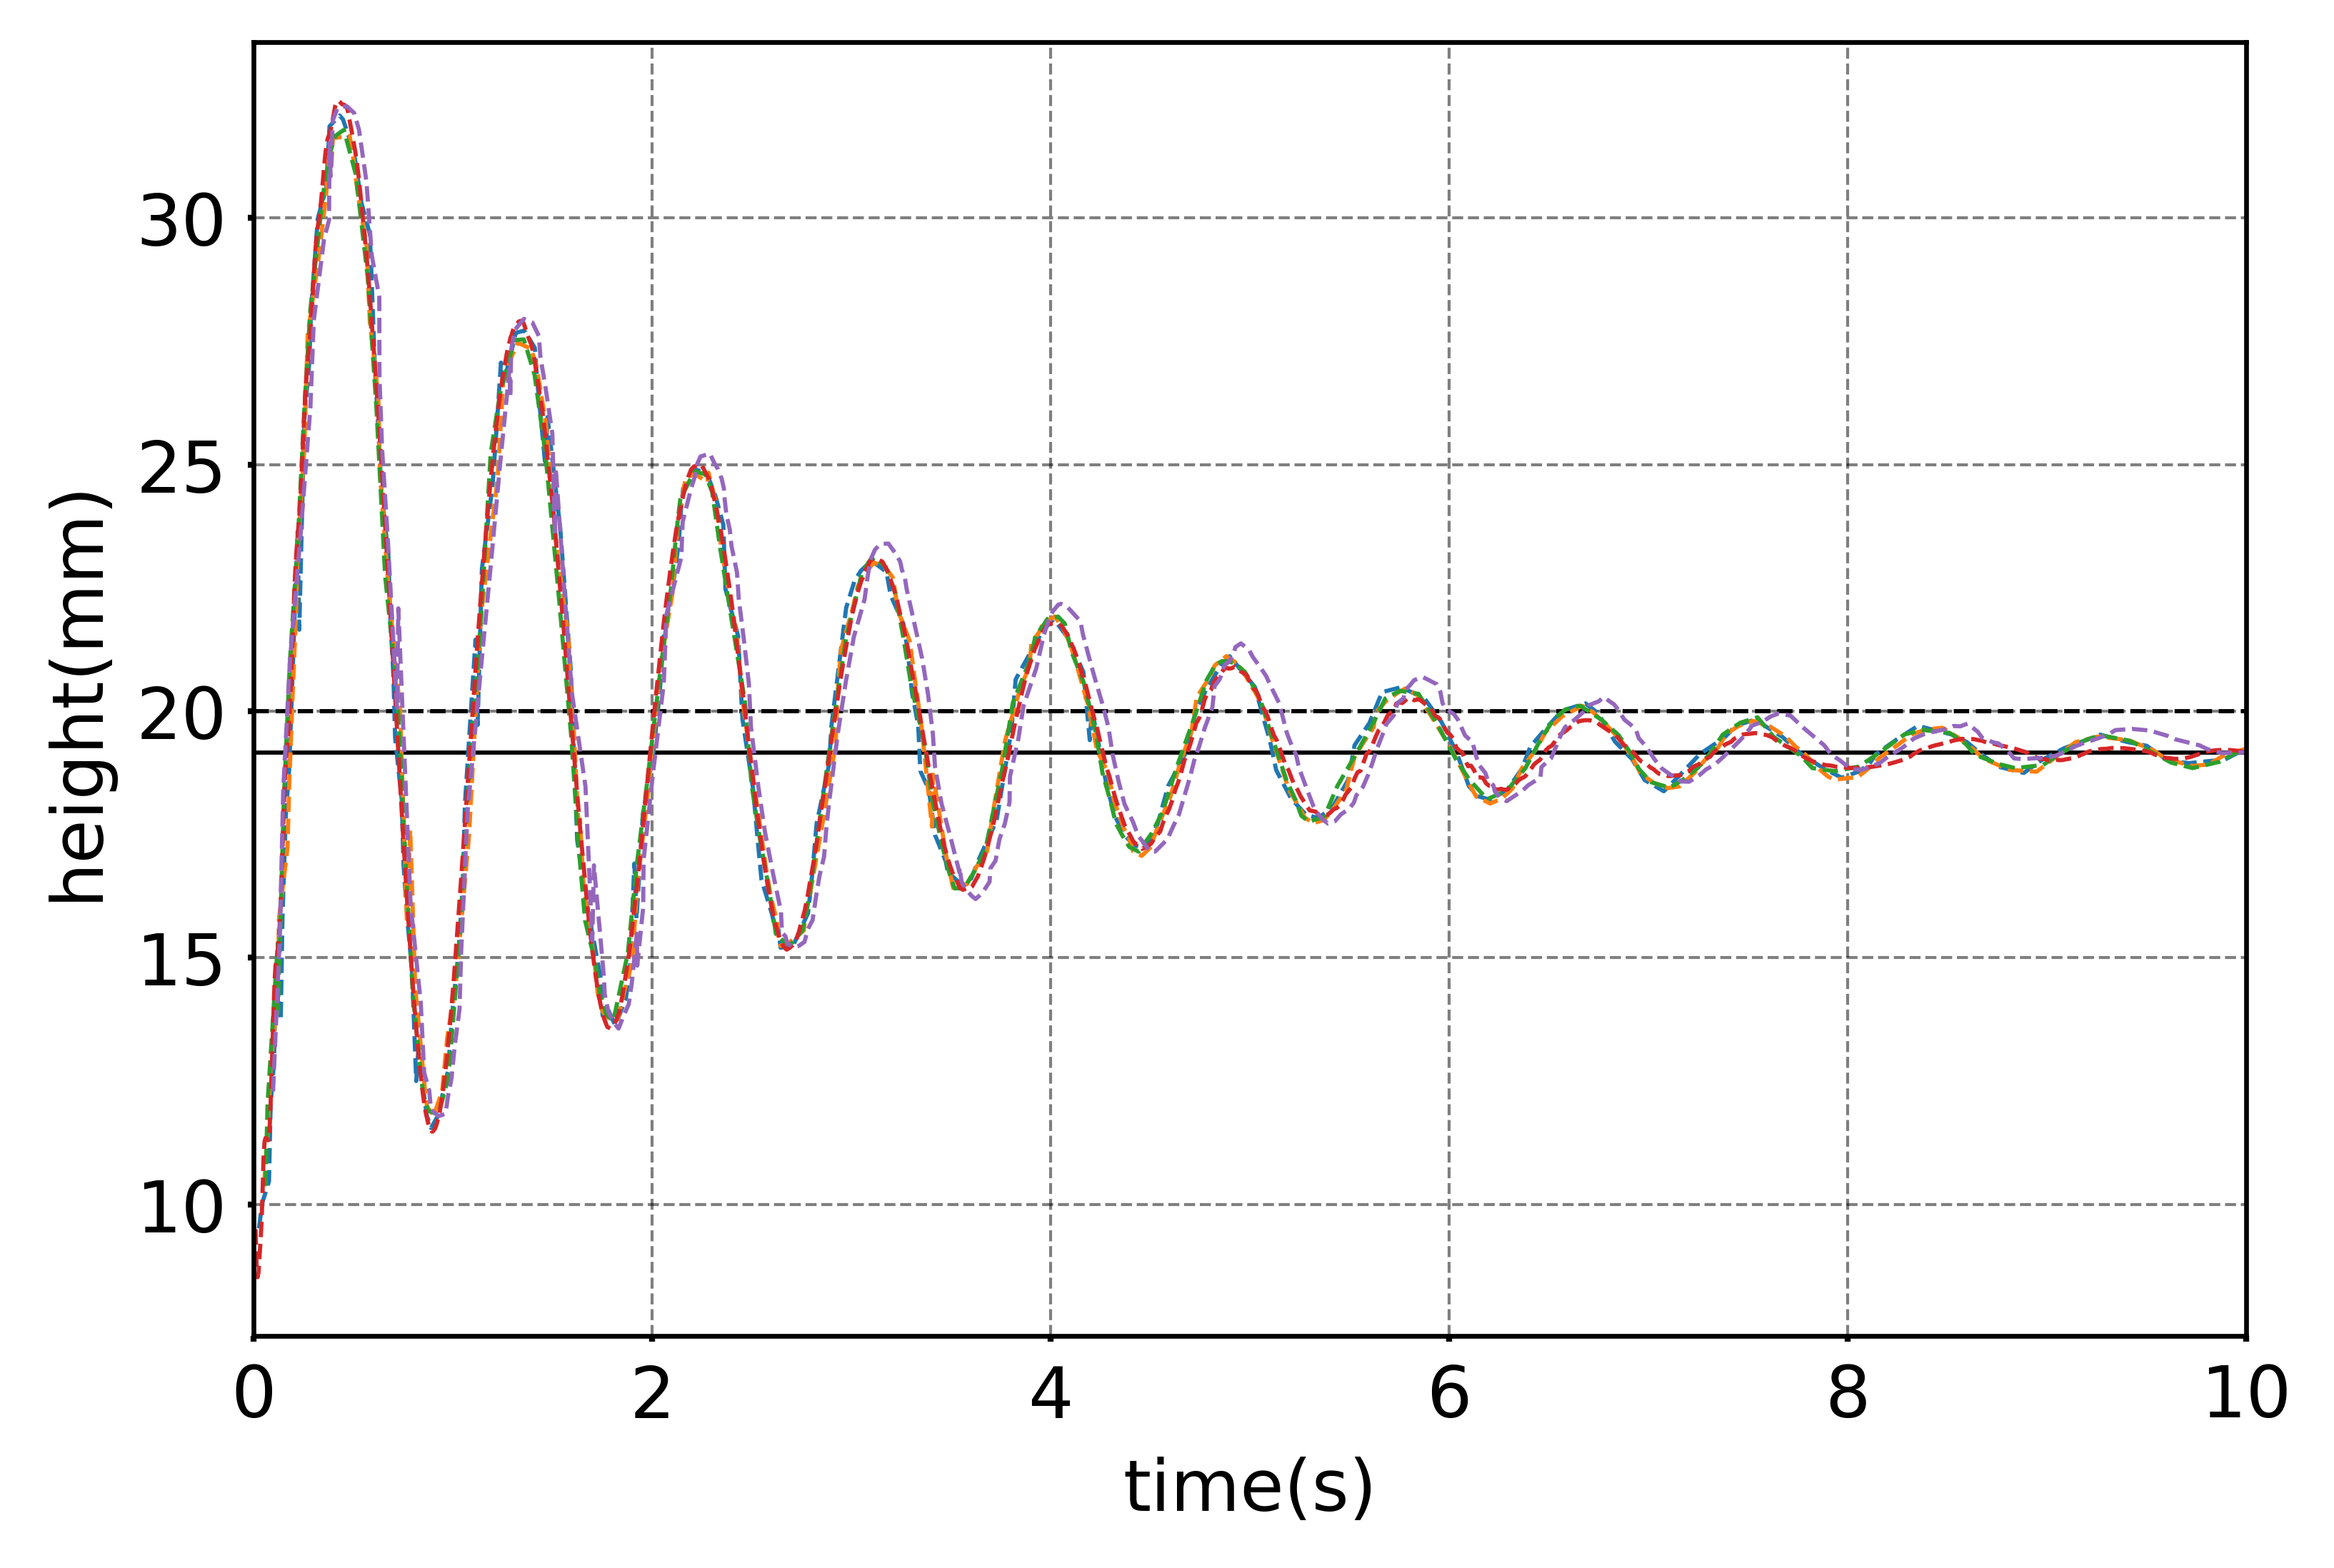

In [4]:

#Reference solution line
plt.axhline(h_j*1000.0, color='black', linewidth=0.7,linestyle='dashed', label = "Jurins height")
#Reference solution line
plt.axhline(h_apex*1000.0, color='black', linewidth=0.7, label = "corrected rise height")

###################################################################################################################
## Simulation Results

def fileStructure():
    #File structure    
    folder = "/numericalMethodComparisonPlots/"
    dataFolder = "Omega0.1"
    pattern = '.csv'
    cwd = os.getcwd()
    fileNames = [cwd + folder +dataFolder +  "/" + fd for fd in os.listdir(cwd + folder +dataFolder) if pattern in fd]    
    return(fileNames)   

##################################################################################################################
    
FileNames = fileStructure()
FileNames.sort()
print(FileNames)


##################################################################################################################

#Plot equilibrium spread against static contact angle

labels=["ALE" , "BoSSS", "FS3d" , "interFlow" , "interFoam"] #cells per radius for the simulaitons

for idx, File in enumerate(FileNames):
    pd.set_option('display.float_format', lambda x: '%.1f' % x)
    df = pd.read_csv(File, index_col = 0)
    plt.plot(df, linewidth=0.7, label=labels[idx], ls ='dashed')
    plt.grid(b=True, which='major', color='black',linestyle='dashed', alpha=0.5, lw=0.5)
    plt.grid(b=True, which='minor', color='black', alpha=0.5, lw=0.5)
    plt.tick_params(axis='both', direction='out', length=1, width=1,  grid_color='black', grid_alpha=0.5)
    #plt.title(r'Capillary height - $\Omega=0.1$', fontsize=fontSize)
    plt.xlabel("time (s)" ,color='black',fontsize=fontSize)
    plt.ylabel("height (mm)",color='black',fontsize=fontSize)
    #plt.legend(loc='lower center', bbox_to_anchor=(0.7, 0), ncol=2, fontsize=fontSize)
    plt.xticks(color='black',size = fontSize)
    plt.yticks(color='black',size = fontSize)
    plt.xlim([0, 10])
    plt.ticklabel_format(axis="y", style="plain", useOffset=False)
    plt.rc('font', size=fontSize)

plt.savefig('capillary-rise-Omega_0_1'+'.png', bbox_inches='tight')
plt.savefig('capillary-rise-Omega_0_1'+'.pdf', bbox_inches='tight')
plt.show()
#######################################################################################


## $\Omega=0.5$

['/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/numericalMethodComparisonPlots/Omega0.5/ALE.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/numericalMethodComparisonPlots/Omega0.5/BoSSS.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/numericalMethodComparisonPlots/Omega0.5/FS3D.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/numericalMethodComparisonPlots/Omega0.5/interFlow.csv', '/home/asghar/ma11kuba/publications/dataForPreprint/benchmarkData/notebooks/2DCapillaryRiseTest/numericalMethodComparisonPlots/Omega0.5/interFoam.csv']


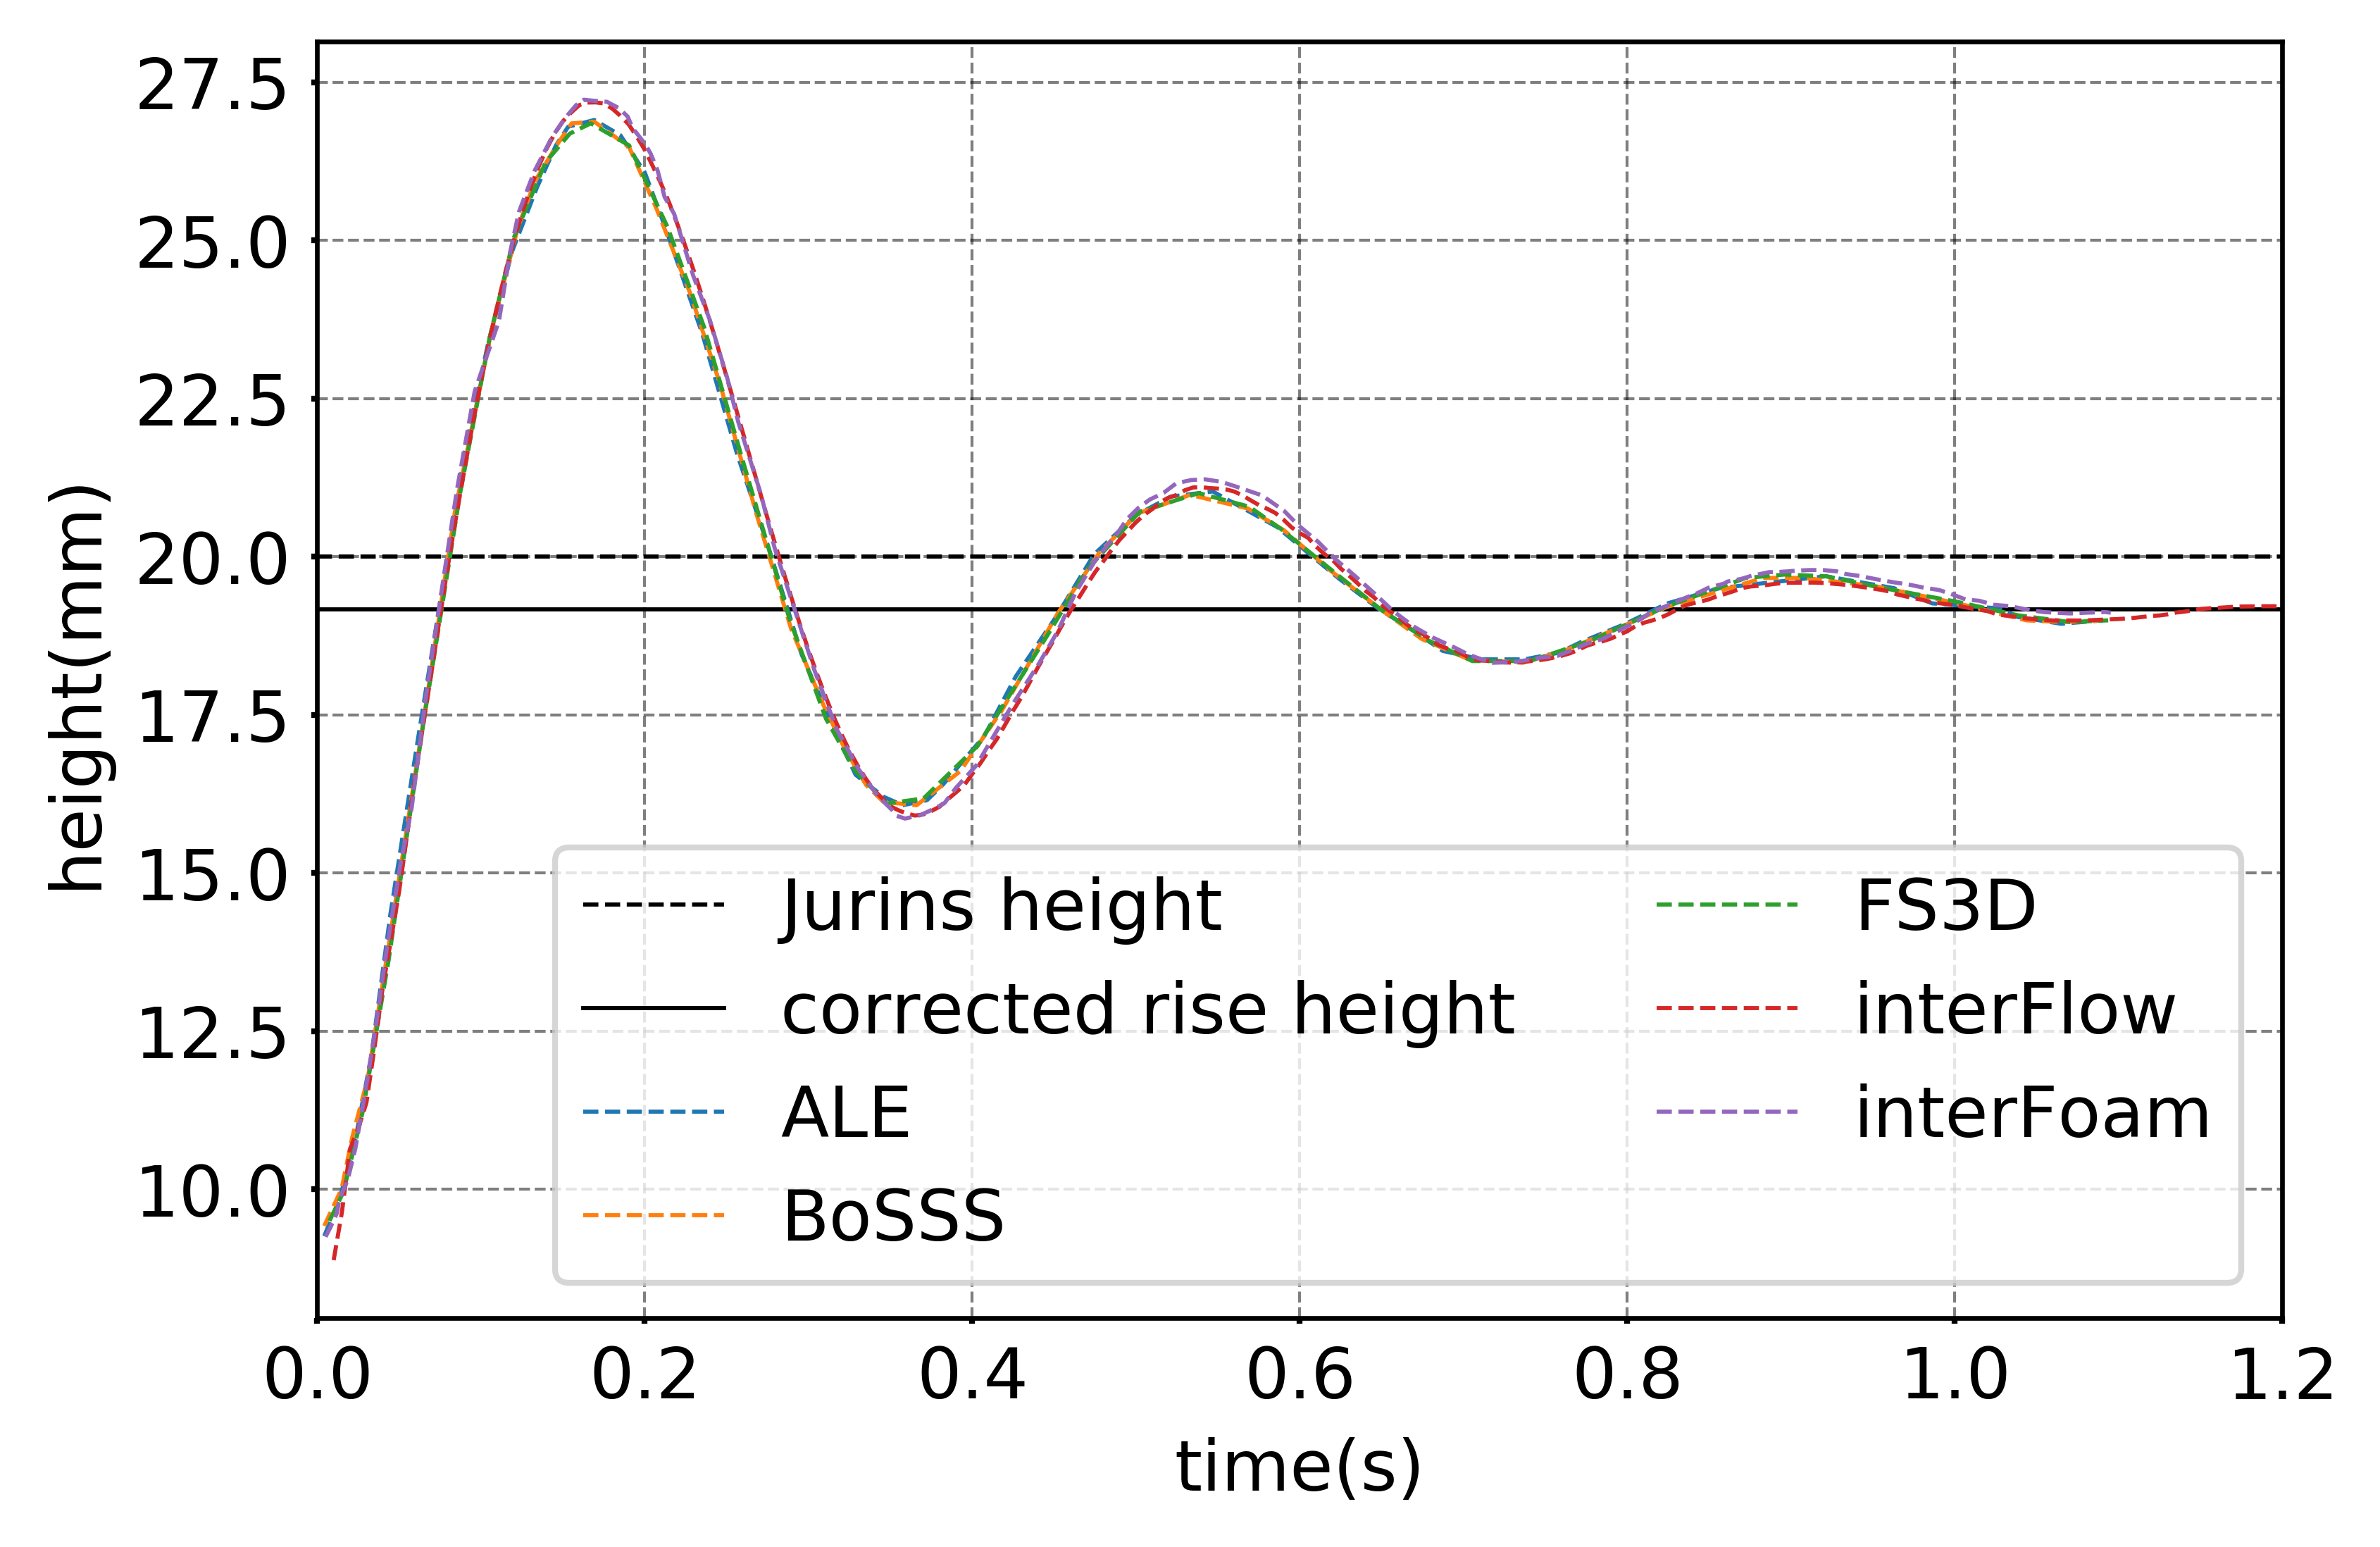

In [5]:

#Reference solution line
plt.axhline(h_j*1000.0, color='black', linewidth=0.7,linestyle='dashed', label = "Jurins height")
#Reference solution line
plt.axhline(h_apex*1000.0, color='black', linewidth=0.7, label = "corrected rise height")

###################################################################################################################
## Simulation Results

def fileStructure():
    #File structure    
    folder = "/numericalMethodComparisonPlots/"
    dataFolder = "Omega0.5"
    pattern = '.csv'
    cwd = os.getcwd()
    fileNames = [cwd + folder +dataFolder +  "/" + fd for fd in os.listdir(cwd + folder +dataFolder) if pattern in fd]    
    return(fileNames)   

##################################################################################################################    
FileNames = fileStructure()
FileNames.sort()
print(FileNames)
##################################################################################################################

#Plot equilibrium spread against static contact angle
labels=["ALE" , "BoSSS", "FS3D" , "interFlow" , "interFoam"] #cells per radius for the simulaitons

for idx, File in enumerate(FileNames):
    pd.set_option('display.float_format', lambda x: '%.1f' % x)
    df = pd.read_csv(File, index_col = 0) 
    plt.plot(df, linewidth=0.7, label=labels[idx], ls ='dashed')
    plt.grid(b=True, which='major', color='black',linestyle='dashed', alpha=0.5, lw=0.5)
    plt.grid(b=True, which='minor', color='black', alpha=0.5, lw=0.5)
    plt.tick_params(axis='both', direction='out', length=1, width=1,  grid_color='black', grid_alpha=0.5)
    #plt.title(r'Capillary height - $\Omega=0.5$', fontsize=fontSize)
    plt.xlabel("time (s)" ,color='black',fontsize=fontSize)
    plt.ylabel("height (mm)",color='black',fontsize=fontSize)
    plt.legend(loc='lower center', bbox_to_anchor=(0.55, 0), ncol=2, fontsize=fontSize)
    plt.xticks(color='black',size = fontSize)
    plt.yticks(color='black',size = fontSize)
    plt.xlim([0, 1.2])
    plt.ticklabel_format(axis="y", style="plain", useOffset=False)
    plt.rc('font', size=fontSize)

plt.savefig('capillary-rise-Omega_0_5'+'.png', bbox_inches='tight')
plt.savefig('capillary-rise-Omega_0_5'+'.pdf', bbox_inches='tight')
plt.show()
#######################################################################################
